In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score


In [ ]:
path = "Student_Performance_Facotors"
df= pd.read_csv(path)
print(df.head() )

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [ ]:
df.shape # Rows and columns 

(6607, 20)

In [ ]:
df.isnull().sum() # Missing values checking  


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [ ]:
print(f"Total missing values: {df.isnull().sum().sum()}" ) # Total missing values 

Total missing values: 235


In [ ]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing Values Percentage:")
print(missing_percent) # Percentage of missing values


Missing Values Percentage:
Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  Teacher_Quality             6607 non-null   int64
 12  School_Type                 6607 non-null   int64
 13  Peer_Influence              6607 non-null   int64
 14  Physical

In [73]:
df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Teacher_Quality_Encoded
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,...,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,1.220070,1.203421,0.596035,7.02906,75.070531,1.307553,0.924474,1.493719,...,1.311185,0.695929,1.190858,2.967610,0.105191,0.896473,1.498411,0.577267,67.235659,1.322991
std,5.990594,11.547475,0.865634,0.871783,0.490728,1.46812,14.399784,0.782515,0.264258,1.230570,...,0.896574,0.460048,0.755876,1.031231,0.306823,0.698511,0.670260,0.494031,3.890456,0.912020
min,1.000000,60.000000,0.000000,0.000000,0.000000,4.00000,50.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000
25%,16.000000,70.000000,0.000000,0.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,65.000000,0.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,2.000000,1.000000,67.000000,2.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,...,2.000000,1.000000,2.000000,4.000000,0.000000,1.000000,2.000000,1.000000,69.000000,2.000000
max,44.000000,100.000000,2.000000,2.000000,1.000000,10.00000,100.000000,2.000000,1.000000,8.000000,...,2.000000,1.000000,2.000000,6.000000,1.000000,2.000000,2.000000,1.000000,101.000000,3.000000


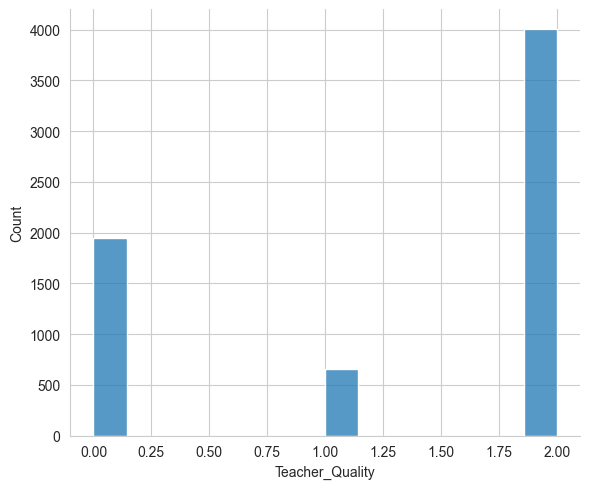

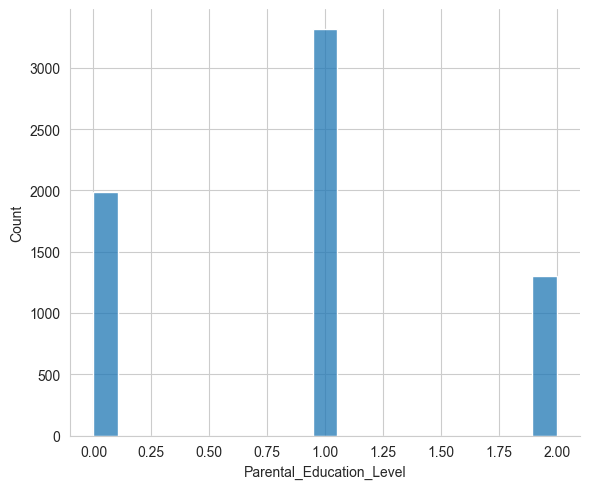

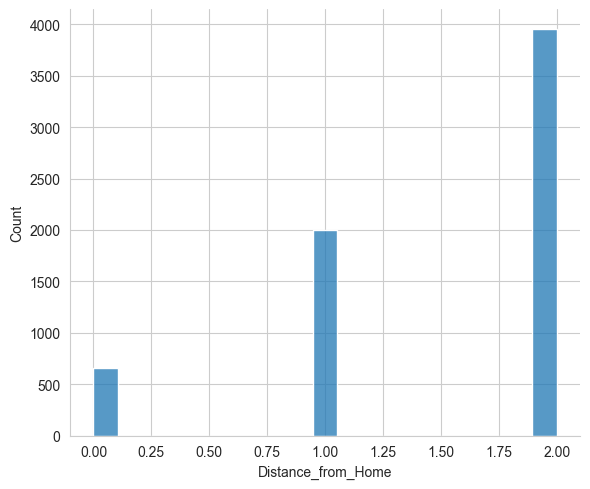

In [74]:
#plotting missing values graphs 
sns.displot(df.Teacher_Quality , height= 5 , aspect= 1.2)
plt.show()
sns.displot(df.Parental_Education_Level, height= 5 ,aspect=1.2)
plt.show()
sns.displot(df.Distance_from_Home , height= 5 ,aspect=1.2)
plt.show()

In [75]:
from sklearn.preprocessing import LabelEncoder
text_columns = df.select_dtypes(include=['object']).columns
print(f"Text column to encode : {list(text_columns)}" )

le = LabelEncoder()
for col in text_columns:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded {col}.")

print("All columns are now numeic.")
print(df.dtypes)    


Text column to encode : []
All columns are now numeic.
Hours_Studied                 int64
Attendance                    int64
Parental_Involvement          int64
Access_to_Resources           int64
Extracurricular_Activities    int64
Sleep_Hours                   int64
Previous_Scores               int64
Motivation_Level              int64
Internet_Access               int64
Tutoring_Sessions             int64
Family_Income                 int64
Teacher_Quality               int64
School_Type                   int64
Peer_Influence                int64
Physical_Activity             int64
Learning_Disabilities         int64
Parental_Education_Level      int64
Distance_from_Home            int64
Gender                        int64
Exam_Score                    int64
Teacher_Quality_Encoded       int64
dtype: object


In [ ]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].median() )
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].median())
df['Distance_from_Home'].fillna(df['Distance_from_Home'].median() ) # filling missing values with median values 

0       2
1       1
2       2
3       1
4       2
       ..
6602    2
6603    2
6604    2
6605    0
6606    2
Name: Distance_from_Home, Length: 6607, dtype: int64

In [78]:
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Teacher_Quality_Encoded
0,23,84,1,0,0,7,73,1,1,0,...,2,1,2,3,0,1,2,1,67,2
1,19,64,1,2,0,8,59,1,1,2,...,2,1,0,4,0,0,1,0,61,2
2,24,98,2,2,1,7,91,2,1,2,...,2,1,1,4,0,2,2,1,74,2
3,29,89,1,2,1,8,98,2,1,1,...,2,1,0,4,0,1,1,1,71,2
4,19,92,2,2,1,6,65,2,1,3,...,0,1,1,4,0,0,2,0,70,0


In [59]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
Teacher_Quality_Encoded       0
dtype: int64

In [41]:
X = df.drop('Exam_Score', axis = 1)
y = df['Exam_Score']

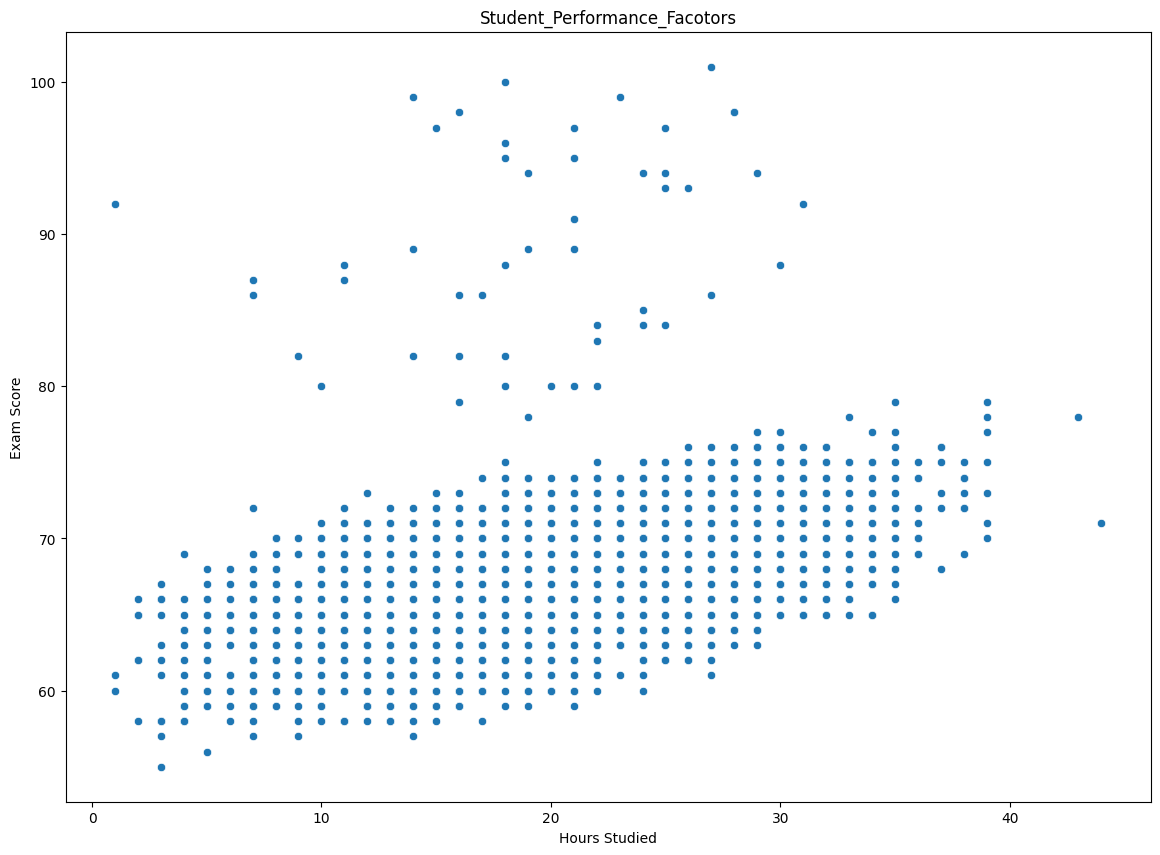

In [47]:
plt.figure(figsize= (14 ,10))
sns.scatterplot(x = 'Hours_Studied', y = 'Exam_Score', data = df)
plt.title("Student_Performance_Facotors")
plt.xlabel("Hours Studied")
plt.ylabel('Exam Score')
plt.show()

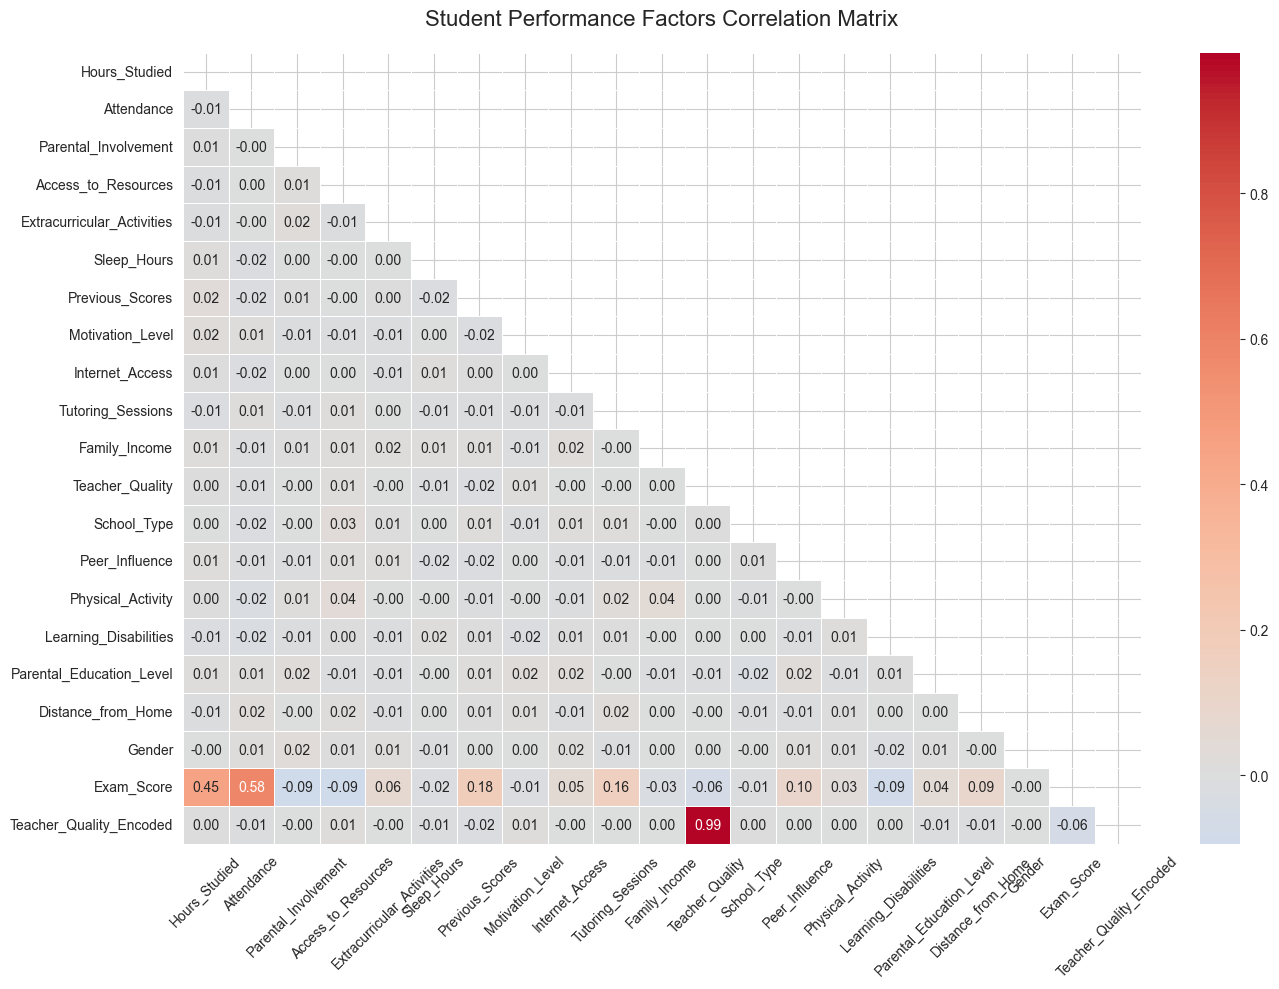

 Factors Correlation with Exam Score:
Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Tutoring_Sessions             0.156525
Peer_Influence                0.100217
Distance_from_Home            0.088934
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Parental_Education_Level      0.044574
Physical_Activity             0.027824
Gender                       -0.002032
School_Type                  -0.008844
Motivation_Level             -0.014910
Sleep_Hours                  -0.017022
Family_Income                -0.026484
Teacher_Quality              -0.060824
Teacher_Quality_Encoded      -0.061772
Learning_Disabilities        -0.085066
Access_to_Resources          -0.090503
Parental_Involvement         -0.094289
Name: Exam_Score, dtype: float64


In [79]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title("Student Performance Factors Correlation Matrix", fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

exam_corr = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print(" Factors Correlation with Exam Score:")
print(exam_corr)

In [80]:
X_train , X_test , y_train ,y_test = train_test_split(X, y , random_state= 42 ,test_size= 0.2)
print("Training Test Size :", X_train.shape)
print("Testing Test Size :",X_test.shape)

Training Test Size : (5285, 20)
Testing Test Size : (1322, 20)


In [87]:
model = LinearRegression()
model.fit(X_train ,y_train)
print("Linear Regression Model")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Model parameters:", model.get_params())

Linear Regression Model
Coefficients: [ 0.28867036  0.19782958 -0.44696657 -0.40435299  0.56957727 -0.02906328
  0.04810873 -0.15457196  0.96845731  0.50241857 -0.16652945 -0.44626025
 -0.03368257  0.53235391  0.17277024 -0.87388222  0.17827193  0.46853459
 -0.01807128  0.20667388]
Intercept: 40.124820879239806
Model parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)


r2_poly_value = r2_score(y_test, y_pred_poly) 
print(f"Polynomial R²: {r2_poly_value:.4f}")

Polynomial R²: 0.7579


In [83]:
y_pred = model.predict(X_test)
result = pd.DataFrame({"Actual " :y_test ,'Predicted':y_pred})
print(result)

      Actual   Predicted
743        65  65.213941
5551       65  67.447183
3442       71  69.827237
6571       64  67.285559
4204       66  66.755365
...       ...        ...
4709       69  67.665728
3664       72  72.125759
5231       66  66.496398
1773       63  64.852827
5782       72  70.509617

[1322 rows x 2 columns]


In [84]:
mae = mean_absolute_error(y_test , y_pred)
msq = mean_squared_error(y_test ,y_pred)
r2_score = r2_score(y_test ,y_pred)

print(f"Mean Absolute Error : {mae:.2f}")
print(f"Mean Squared Error {msq:.2f}")
print(f"r2 Score : {r2_score:.4f}")


Mean Absolute Error : 1.02
Mean Squared Error 4.40
r2 Score : 0.6886


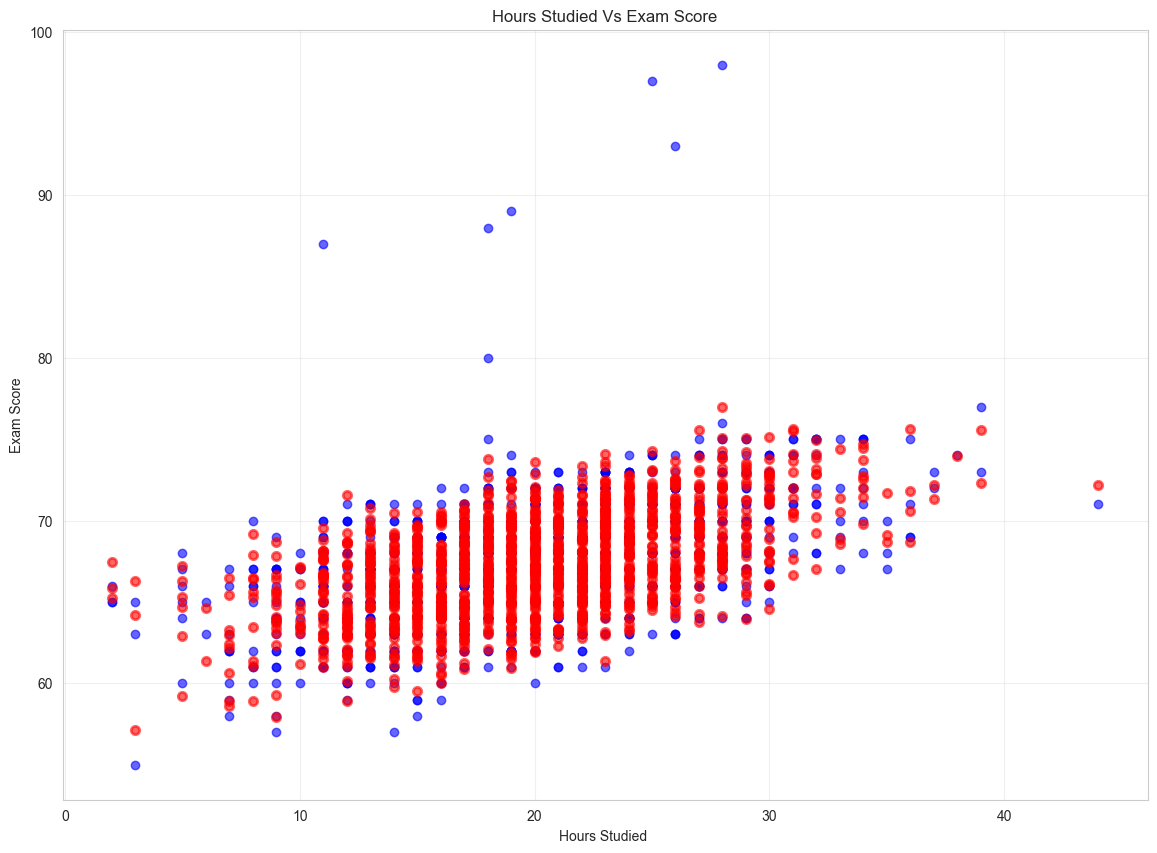

In [85]:
plt.figure(figsize= (14 ,10))
plt.scatter(X_test['Hours_Studied'] ,y_test , label = "Acutal Data",color = 'blue', alpha = 0.6)
plt.scatter(X_test['Hours_Studied'] ,y_pred ,label = 'Regression Line' ,color = 'red',linewidths= 2, alpha = 0.6)
plt.title("Hours Studied Vs Exam Score")
plt.xlabel("Hours Studied ")
plt.ylabel("Exam Score")
plt.grid(True ,alpha = 0.3)
plt.show()

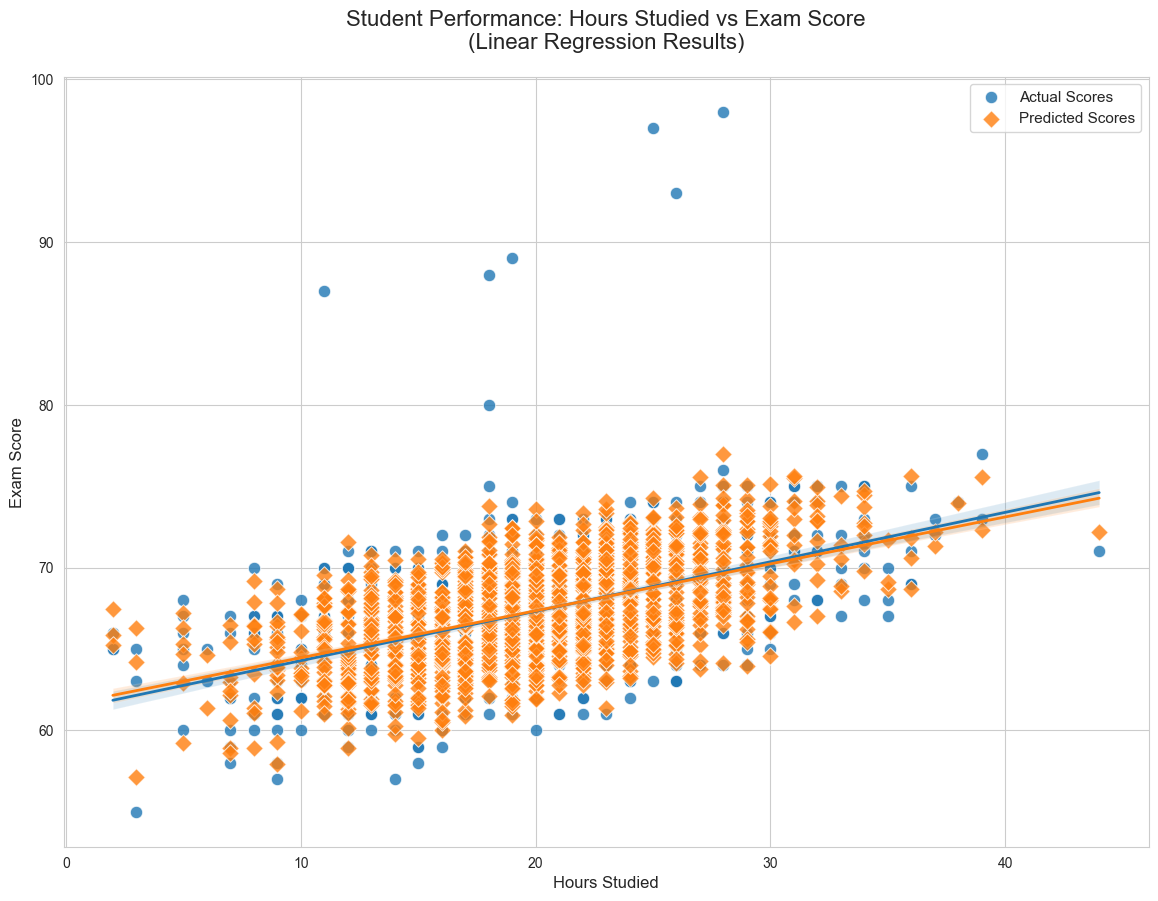

In [86]:
plt.figure(figsize=(14, 10))


sns.set_style("whitegrid")
sns.scatterplot(x=X_test['Hours_Studied'], y=y_test, 
                label='Actual Scores', color='#1f77b4', s=80, alpha=0.8)
sns.scatterplot(x=X_test['Hours_Studied'], y=y_pred, 
                label='Predicted Scores', color='#ff7f0e', s=80, alpha=0.8, marker='D')


sns.regplot(x=X_test['Hours_Studied'], y=y_test, 
            scatter=False, line_kws={'color': '#1f77b4', 'linewidth': 2})
sns.regplot(x=X_test['Hours_Studied'], y=y_pred, 
            scatter=False, line_kws={'color': '#ff7f0e', 'linewidth': 2})

plt.title('Student Performance: Hours Studied vs Exam Score\n(Linear Regression Results)', 
          fontsize=16, pad=20)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(fontsize=11)
plt.show()